In [1]:
!pip install imblearn


In [2]:
import math
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn import svm, metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from  sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
import scipy.spatial.distance as distance


### Data Preprocessing

In [3]:
main2 =pd.read_csv ("survey.csv")


In [4]:
main2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
main2

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [6]:
main2.drop(["Timestamp", "comments", "state"], axis=1, inplace=True)

In [7]:
main2.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [8]:
main2["self_employed"].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [9]:
main2["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [10]:
# Filling up empty cells using simple imputer 
# since the nans are in the object and int dataframe, mean or median imputer cannot be used to fill up 
# rather would make use of the most frequent/mode to fill up

imputer = SimpleImputer(strategy='most_frequent')
main2[['self_employed', 'work_interfere']] = imputer.fit_transform(main2[['self_employed', 'work_interfere']])

In [11]:
main2.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [12]:
main2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

### Sreamlining the age category

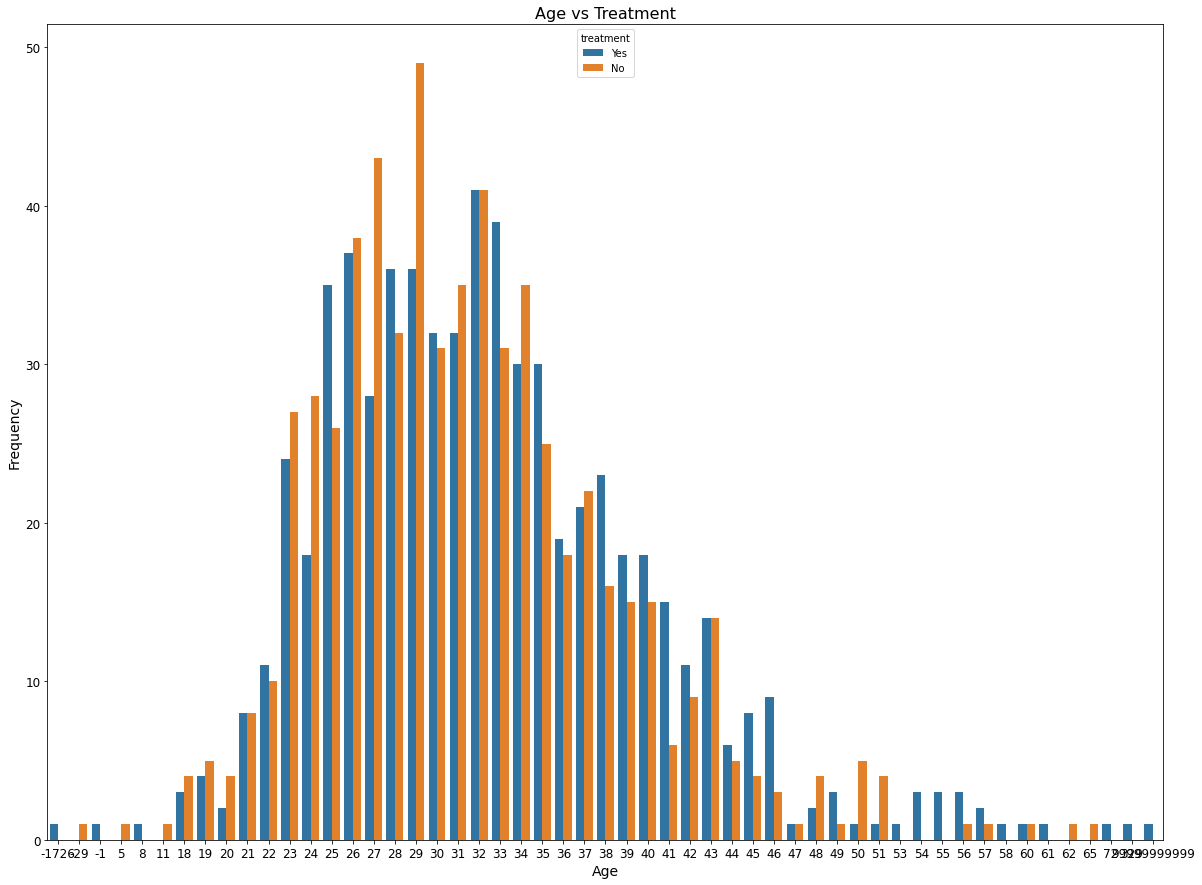

In [13]:
fig = plt.figure(figsize=(20, 15))

sns.countplot(data=main2, x="Age", hue="treatment")

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()









In [14]:
main2['Age'].median()

31.0

In [15]:
# Replacing ages greater than 65 and ages less than 18 with the median

main2['Age'][main2['Age'] > 65] = main2['Age'].median()
main2['Age'][main2['Age'] < 18] = main2['Age'].median()

In [16]:
main2['Age'].describe()

count    1259.000000
mean       32.037331
std         7.177803
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        65.000000
Name: Age, dtype: float64

### Relationship between Age Category and Treatment

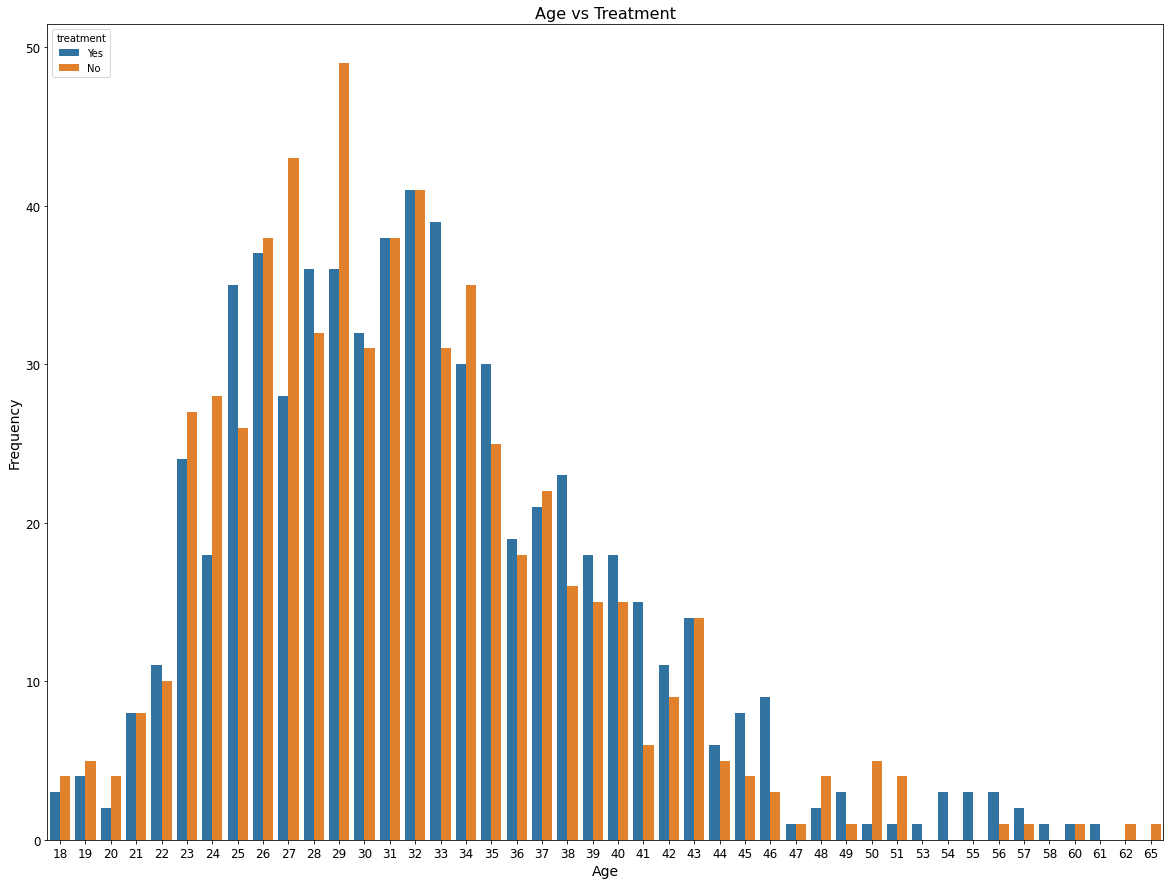

In [17]:
fig = plt.figure(figsize=(20, 15))

sns.countplot(data=main2, x="Age", hue="treatment")

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Classifying the Gender in Groups

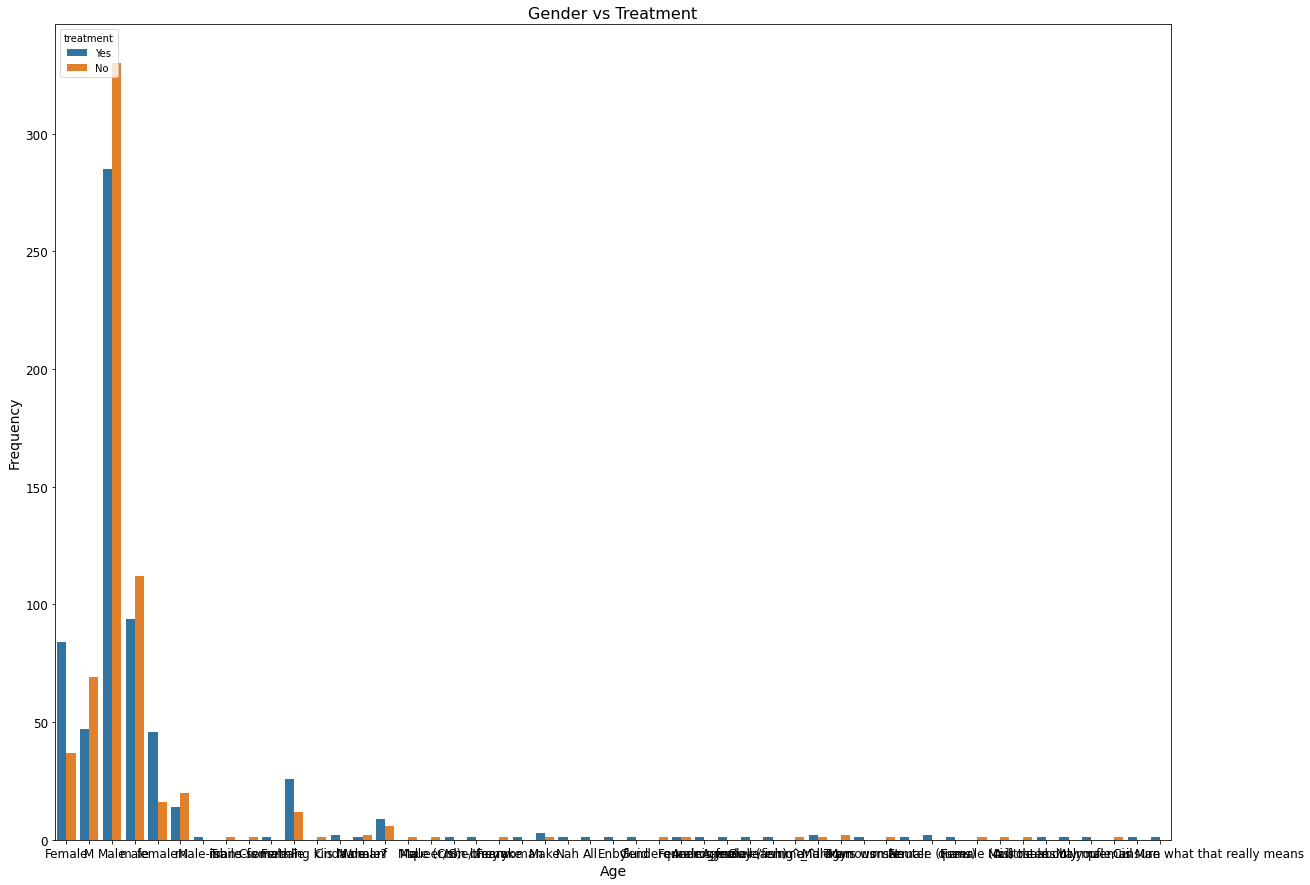

In [18]:
fig = plt.figure(figsize=(20, 15))

sns.countplot(data=main2, x="Gender", hue="treatment")

plt.title(label='Gender vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [19]:
main2["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [20]:
unique_gender = main2['Gender'].str.lower().unique()

# Stratas of Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", 
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male", 
            "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", 
             "non-binary","nah", "all", "enby", "fluid", "genderqueer", 
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", 
             "trans woman", "neuter", "female (trans)", "queer", 
             "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ", 
              "cis-female/femme", "female (cis)", "femail"]

# Iterate over rows and replace the inconsistent data with right data
for (row, col) in main2.iterrows():
    if str.lower(col['Gender']) in male_str:
        main2['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)
        
    if str.lower(col['Gender']) in female_str:
        main2['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)
        
    if str.lower(col['Gender']) in trans_str:
        main2['Gender'].replace(to_replace=col['Gender'], value='trans', inplace=True)

# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
main2 = main2[~main2['Gender'].isin(stk_list)]

# Display the unique value of Gender feature
print(main2['Gender'].unique())

['female' 'male' 'trans']


### Relationship Between Gender and Treatment

In [21]:
main2['Gender'].value_counts()

male      991
female    247
trans      19
Name: Gender, dtype: int64

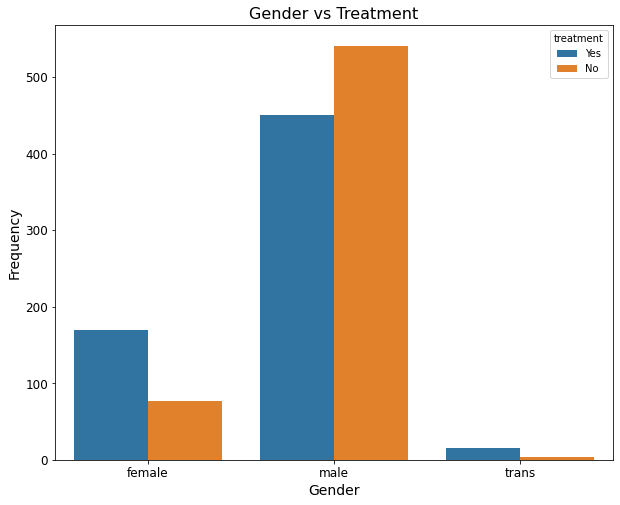

In [22]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=main2, x="Gender", hue="treatment")

plt.title(label='Gender vs Treatment', size=16)
plt.xlabel(xlabel='Gender', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Relationship between Nature of Jobs and Treatment

In [23]:
main2['self_employed'].value_counts()

No     1113
Yes     144
Name: self_employed, dtype: int64

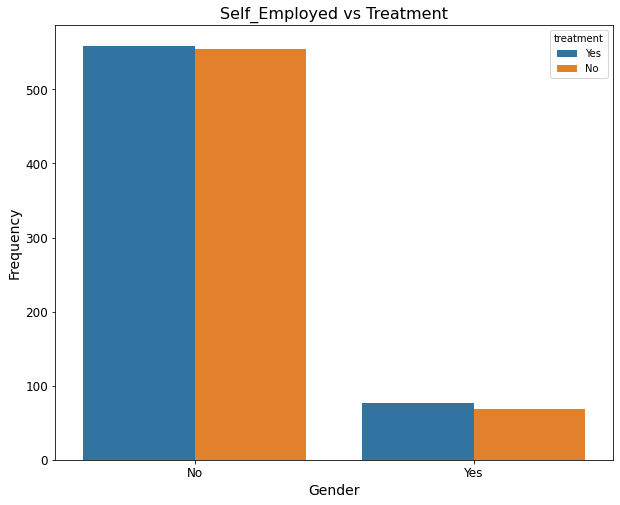

In [24]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=main2, x="self_employed", hue="treatment")

plt.title(label='Self_Employed vs Treatment', size=16)
plt.xlabel(xlabel='Gender', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Relationship Between Work Interference and Treatment

In [25]:
main2['work_interfere'].value_counts()

Sometimes    729
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64

In [26]:
main2[main2['treatment']=='Yes']['work_interfere'].value_counts()

Sometimes    362
Rarely       122
Often        121
Never         30
Name: work_interfere, dtype: int64

In [27]:
main2[main2['treatment']=='No']['work_interfere'].value_counts()

Sometimes    367
Never        183
Rarely        51
Often         21
Name: work_interfere, dtype: int64

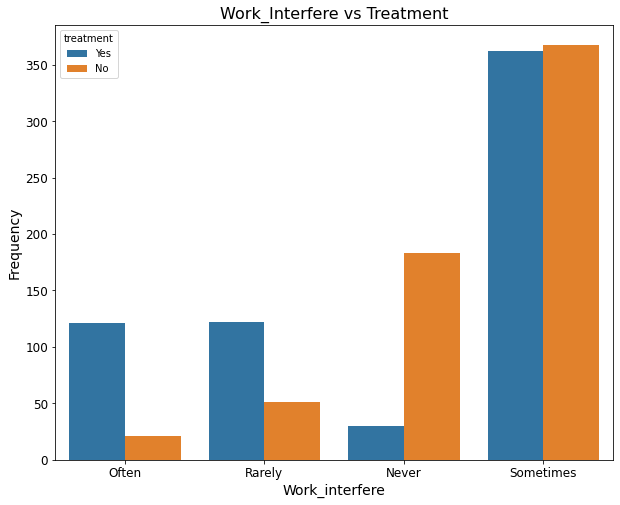

In [28]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=main2, x='work_interfere', hue='treatment')

plt.title(label='Work_Interfere vs Treatment', size=16)
plt.xlabel(xlabel='Work_interfere', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


### Relationship Between Number of Employees and Treatment

In [29]:
main2['no_employees'].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               160
500-1000           60
Name: no_employees, dtype: int64

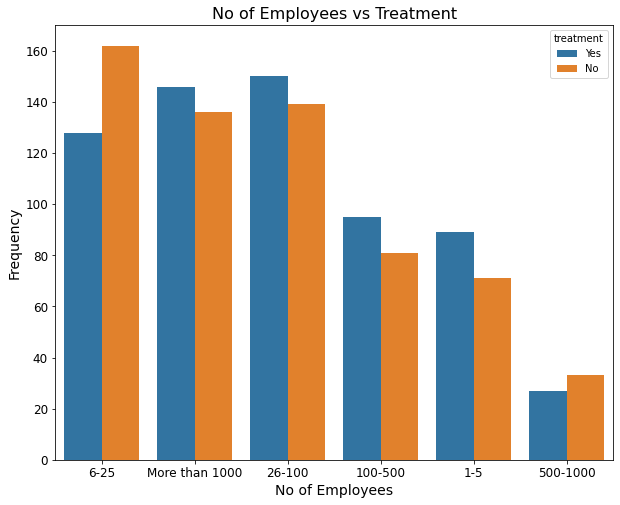

In [30]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=main2, x='no_employees', hue='treatment')

plt.title(label='No of Employees vs Treatment', size=16)
plt.xlabel(xlabel='No of Employees', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


In [31]:
main2[main2['treatment']=='Yes']['no_employees'].value_counts()

26-100            150
More than 1000    146
6-25              128
100-500            95
1-5                89
500-1000           27
Name: no_employees, dtype: int64

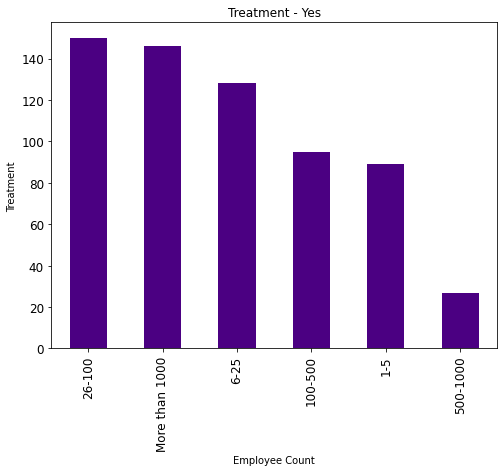

In [32]:
fig = plt.figure(figsize=(8,6))

main2[main2['treatment'] == 'Yes']['no_employees'].value_counts().plot.bar(color='indigo')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count')
plt.ylabel(ylabel='Treatment')
plt.title(label='Treatment - Yes')

plt.show()

In [33]:
main2[main2['treatment']=='No']['no_employees'].value_counts()

6-25              162
26-100            139
More than 1000    136
100-500            81
1-5                71
500-1000           33
Name: no_employees, dtype: int64

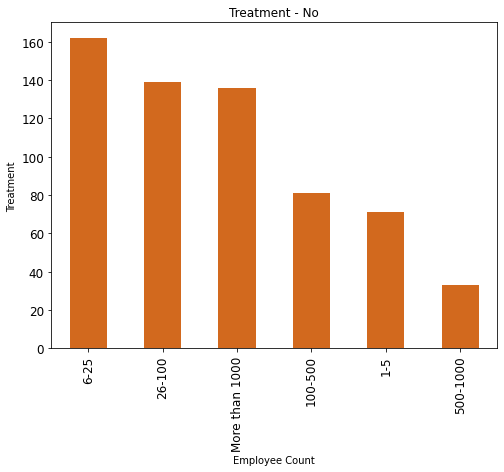

In [34]:
fig = plt.figure(figsize=(8,6))

main2[main2['treatment'] == 'No']['no_employees'].value_counts().plot.bar(color='chocolate')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Employee Count')
plt.ylabel(ylabel='Treatment')
plt.title(label='Treatment - No')

plt.show()

### Relationship Between Family History and Treatment

In [35]:
main2['family_history'].value_counts()

No     767
Yes    490
Name: family_history, dtype: int64

In [36]:
main2[main2['treatment']=='Yes']['family_history'].value_counts()

Yes    363
No     272
Name: family_history, dtype: int64

In [37]:
main2[main2['treatment']=='No']['family_history'].value_counts()

No     495
Yes    127
Name: family_history, dtype: int64

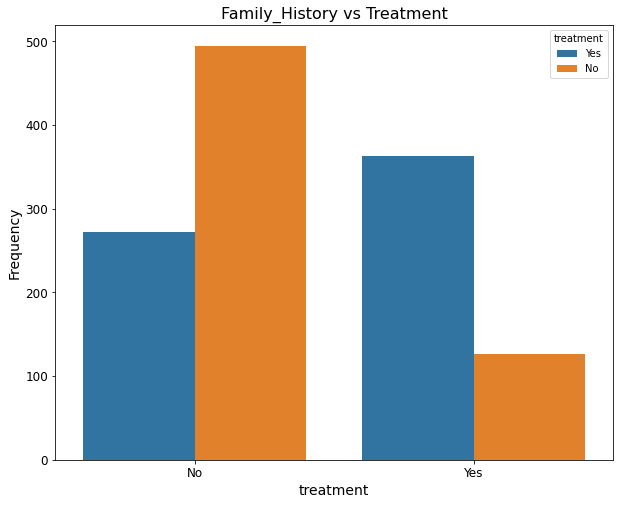

In [38]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=main2, x='family_history', hue='treatment')

plt.title(label='Family_History vs Treatment', size=16)
plt.xlabel(xlabel='treatment', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Realtionship Between Country and Treatment

In [39]:
main2['Country'].value_counts()

United States             750
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Greece                      2
Denmark                     2
Colombia                    2
Portugal                    2
Croatia                     2
Moldova                     1
Georgia                     1
Nigeria                     1
China                       1
Thailand  

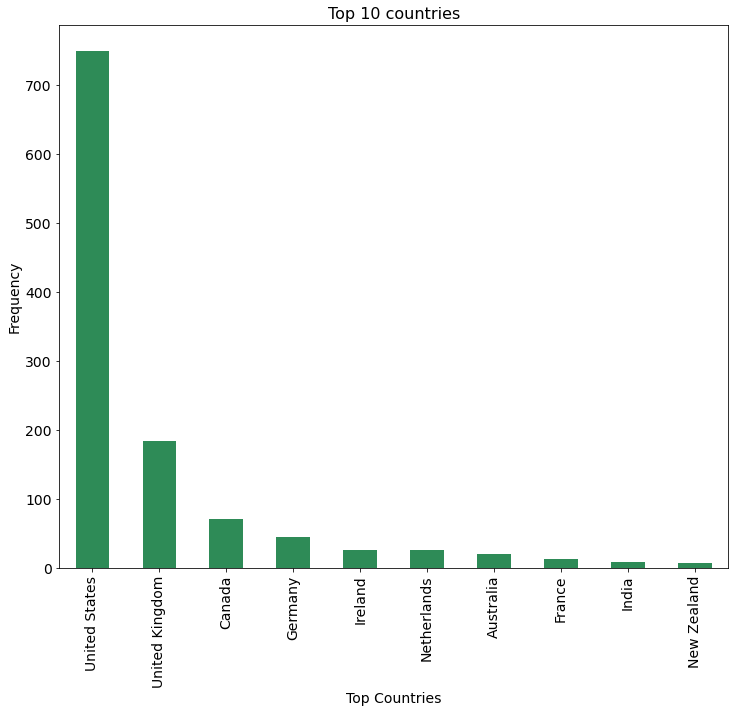

In [40]:
fig = plt.figure(figsize=[12,10])

main2['Country'].value_counts().head(10).plot.bar(color='Seagreen')

plt.xticks(rotation='vertical', size=14)
plt.yticks(size=14)
plt.xlabel(xlabel ='Top Countries', size=14)
plt.ylabel(ylabel ='Frequency', size=14)
plt.title(label ='Top 10 countries', size=16)

plt.show()




In [41]:
main2[main2['treatment']=='Yes']['Country'].value_counts().head(10)

United States     409
United Kingdom     93
Canada             37
Germany            21
Ireland            13
Australia          13
Netherlands         9
New Zealand         5
South Africa        4
Poland              4
Name: Country, dtype: int64

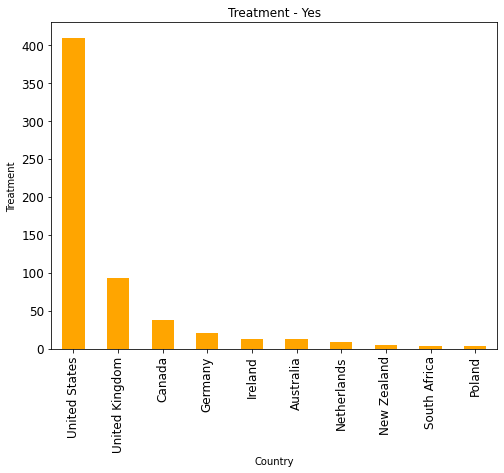

In [42]:
fig = plt.figure(figsize=(8,6))

main2[main2['treatment'] == 'Yes']['Country'].value_counts().head(10).plot.bar(color='orange')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Country')
plt.ylabel(ylabel='Treatment')
plt.title(label='Treatment - Yes')

plt.show()

In [43]:
main2[main2['treatment']=='No']['Country'].value_counts().head(10)

United States     341
United Kingdom     92
Canada             35
Germany            24
Netherlands        18
Ireland            14
France             11
Australia           8
India               7
Italy               6
Name: Country, dtype: int64

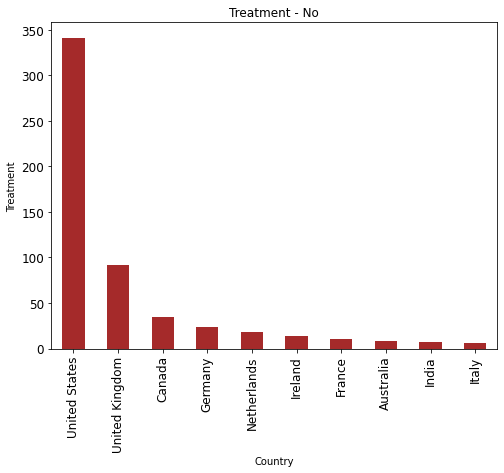

In [44]:
fig = plt.figure(figsize=(8,6))

main2[main2['treatment'] == 'No']['Country'].value_counts().head(10).plot.bar(color='Brown')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Country')
plt.ylabel(ylabel='Treatment')
plt.title(label='Treatment - No')

plt.show()

In [45]:
### Relationship Between Care Options and Treatrment

In [46]:
main2['care_options'].value_counts()

No          501
Yes         442
Not sure    314
Name: care_options, dtype: int64

In [47]:
main2[main2['treatment']=='Yes']['care_options'].value_counts()

Yes         305
No          207
Not sure    123
Name: care_options, dtype: int64

In [48]:
main2[main2['treatment']=='Yes']['care_options'].value_counts()

Yes         305
No          207
Not sure    123
Name: care_options, dtype: int64

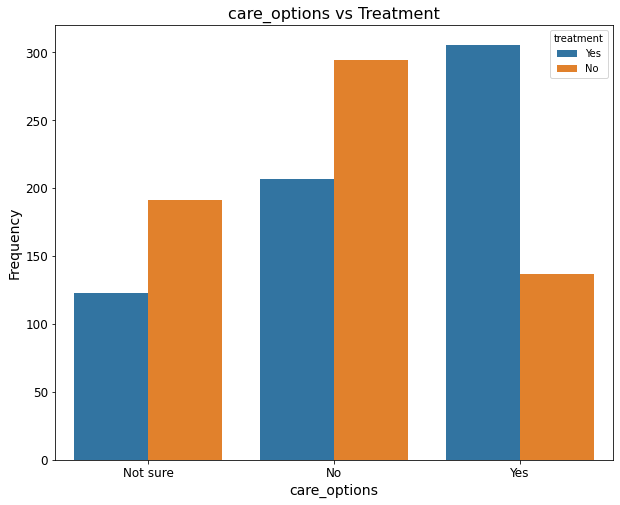

In [49]:
fig = plt.figure(figsize=(10, 8))

sns.countplot(data=main2, x='care_options', hue='treatment')

plt.title(label='care_options vs Treatment', size=16)
plt.xlabel(xlabel='care_options', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

### Converting variables into lower strings

In [50]:
main2.columns = main2.columns.str.lower()
main2.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Data Encoding

In [51]:
# Encoding my categoprical variables 
label_encoder = preprocessing.LabelEncoder()
main2['gender']= label_encoder.fit_transform(main2['gender'])
main2['self_employed']= label_encoder.fit_transform(main2['self_employed'])
main2['country']= label_encoder.fit_transform(main2['country'])
main2['family_history']= label_encoder.fit_transform(main2['family_history'])
main2['treatment']= label_encoder.fit_transform(main2['treatment'])
main2['work_interfere']= label_encoder.fit_transform(main2['work_interfere'])
main2['no_employees']= label_encoder.fit_transform(main2['no_employees'])
main2['remote_work']= label_encoder.fit_transform(main2['remote_work'])
main2['tech_company']= label_encoder.fit_transform(main2['tech_company'])
main2['benefits']= label_encoder.fit_transform(main2['benefits'])
main2['care_options']= label_encoder.fit_transform(main2['care_options'])
main2['wellness_program']= label_encoder.fit_transform(main2['wellness_program'])
main2['seek_help']= label_encoder.fit_transform(main2['seek_help'])
main2['anonymity']= label_encoder.fit_transform(main2['anonymity'])
main2['leave']= label_encoder.fit_transform(main2['leave'])
main2['mental_health_consequence']= label_encoder.fit_transform(main2['mental_health_consequence'])
main2['phys_health_consequence']= label_encoder.fit_transform(main2['phys_health_consequence'])
main2['coworkers']= label_encoder.fit_transform(main2['coworkers'])
main2['supervisor']= label_encoder.fit_transform(main2['supervisor'])
main2['mental_health_interview']= label_encoder.fit_transform(main2['mental_health_interview'])
main2['phys_health_interview']= label_encoder.fit_transform(main2['phys_health_interview'])
main2['mental_vs_physical']= label_encoder.fit_transform(main2['mental_vs_physical'])
main2['obs_consequence']= label_encoder.fit_transform(main2['obs_consequence'])

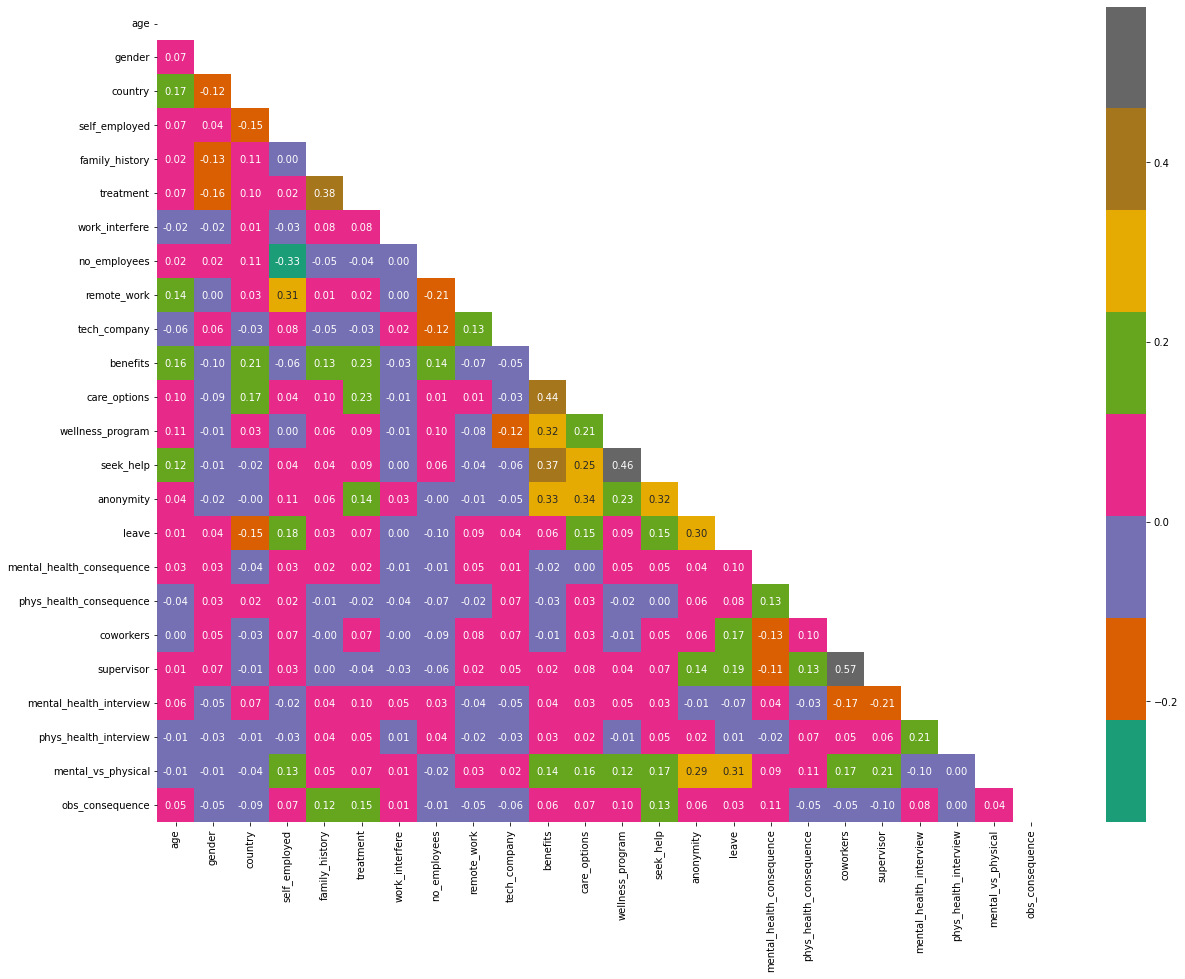

In [52]:
corr=main2.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='Dark2', annot=True, fmt='.2f',
mask=np.triu(corr))
plt.show()

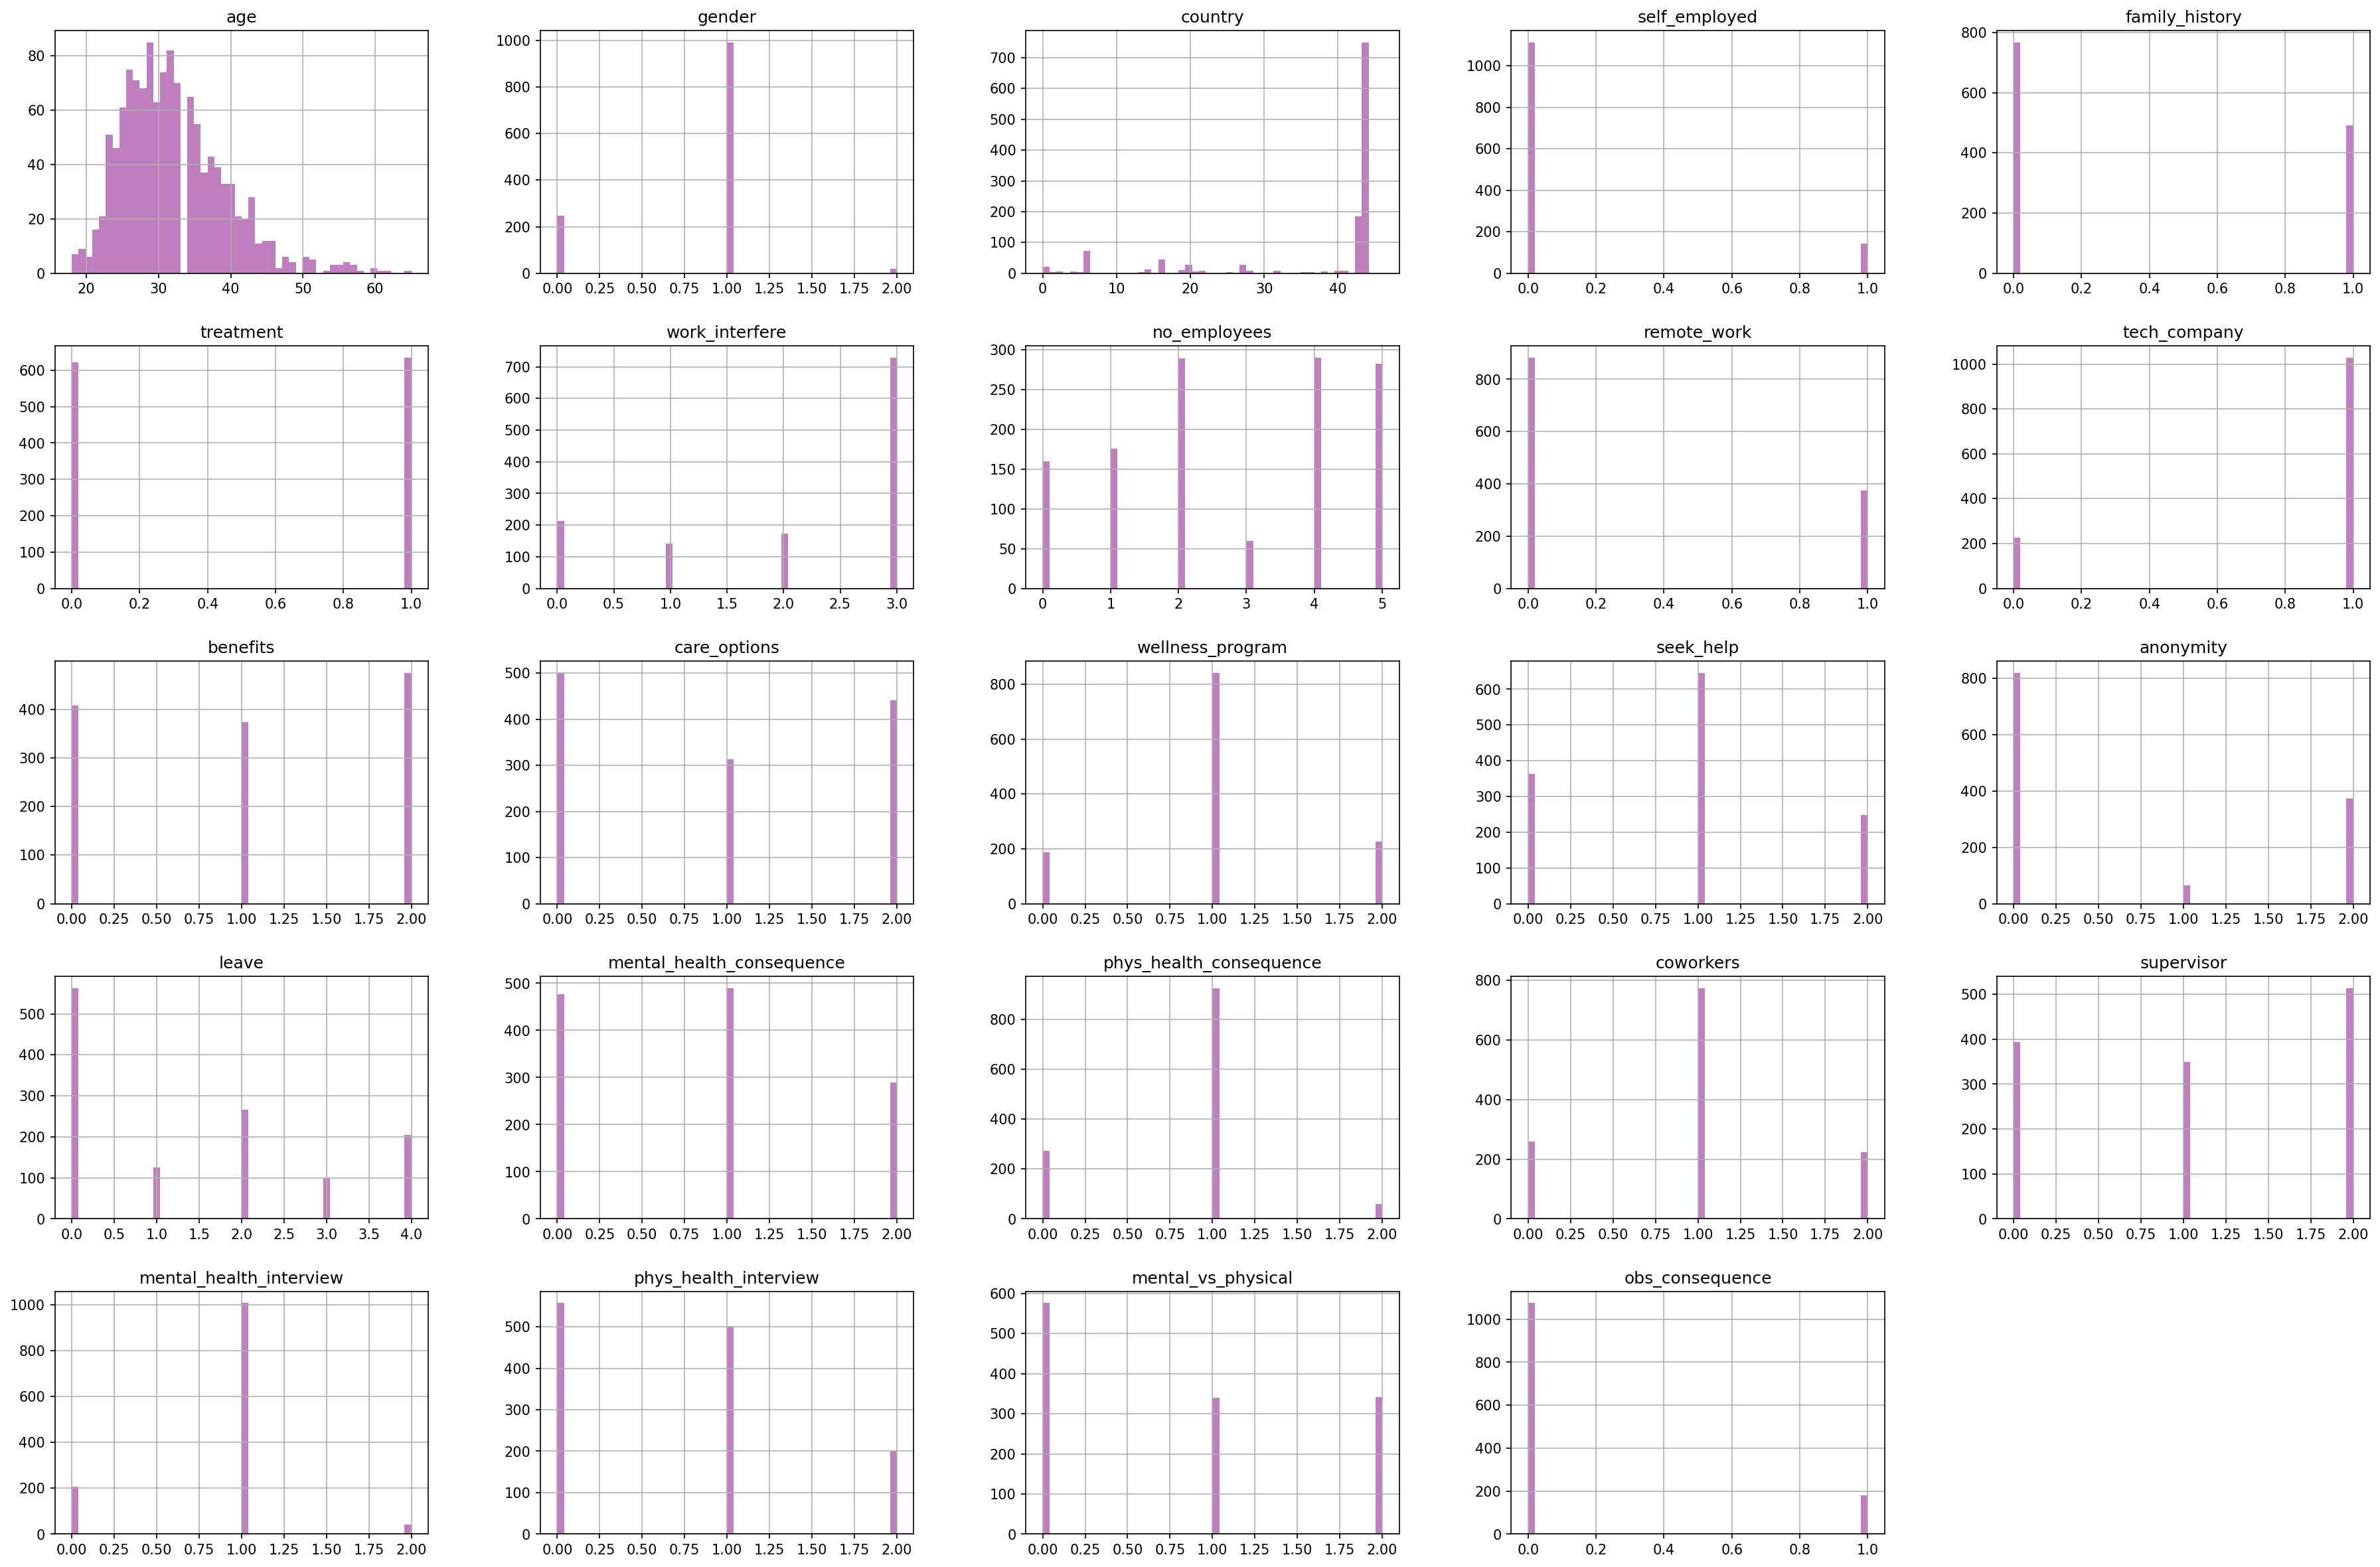

In [53]:
fig,ax=plt.subplots(figsize = (30, 20), dpi = 150)
main2.hist(bins = 50, alpha = 0.5, color='purple', ax=ax)
plt.ylabel('Frequency')
plt.show()

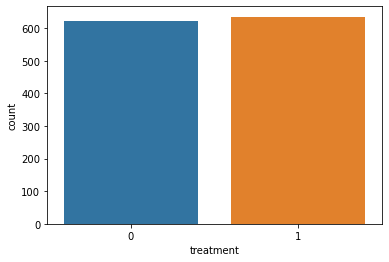

In [54]:
sns.countplot(data=main2, x="treatment")
plt.show()

In [55]:
X= main2.drop("treatment", axis = 1)
Y= main2["treatment"]


### Scalling the Dataset

In [56]:
scalar = MinMaxScaler().fit(X)

In [57]:
main_2 = pd.DataFrame(data=scalar.transform(X), columns=X.columns)

In [58]:
main_2

,age,gender,country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.404255,0.0,0.956522,0.0,0.0,0.333333,0.8,0.0,1.0,1.0,...,1.0,0.50,0.5,0.5,0.5,1.0,0.5,0.0,1.0,0.0
1,0.553191,0.5,0.956522,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.5,0.0,0.0,0.5,0.5,0.0,0.0
2,0.297872,0.5,0.130435,0.0,0.0,0.666667,0.8,0.0,1.0,0.5,...,0.0,0.25,0.5,0.5,1.0,1.0,1.0,1.0,0.5,0.0
3,0.276596,0.5,0.934783,0.0,1.0,0.333333,0.4,0.0,1.0,0.5,...,0.5,0.25,1.0,1.0,0.5,0.0,0.0,0.0,0.5,1.0
4,0.276596,0.5,0.956522,0.0,0.0,0.000000,0.2,1.0,1.0,1.0,...,0.0,0.00,0.5,0.5,0.5,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.170213,0.5,0.934783,0.0,0.0,1.000000,0.4,0.0,1.0,0.5,...,0.0,0.50,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0
1253,0.297872,0.5,0.956522,0.0,1.0,0.333333,0.4,1.0,1.0,1.0,...,1.0,0.25,0.5,0.5,0.5,1.0,0.5,0.5,1.0,0.0
1254,0.340426,0.5,0.956522,0.0,1.0,1.000000,1.0,0.0,1.0,1.0,...,0.0,0.25,1.0,1.0,0.0,0.0,0.5,0.5,0.5,0.0
1255,0.595745,0.0,0.956522,0.0,0.0,1.000000,0.2,1.0,1.0,0.5,...,0.0,0.00,1.0,0.5,0.0,0.0,0.5,0.5,0.5,0.0


### Splitting the Dataset into Training and Testing

In [59]:
X_train, X_test, Y_train, Y_test= train_test_split(main_2, Y, test_size=0.25,random_state=108)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(942, 23) (315, 23) (942,) (315,)


In [60]:
Y_train.value_counts()

1    479
0    463
Name: treatment, dtype: int64

### Implementing the Models

### Random Forest

In [61]:
rf=RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, random_state=108)
rf.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=0.01, n_estimators=10, n_jobs=-1,
                       random_state=108)

In [62]:
train_pred1 = rf.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred1))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred1))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred1))

Accuracy on training data:  0.7707006369426752
Precision on training data: 0.7768421052631579
Recall on training data: 0.7703549060542797


In [63]:
test_pred1=rf.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred1))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred1))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred1))

Accuracy on testing data:  0.7492063492063492
Precision on testing data: 0.7333333333333333
Recall on testing data:  0.7756410256410257


### Random Forest Feature Importance

In [64]:
importances = rf.feature_importances_

Text(0.5, 1.0, 'Feature Importance in Random Forest')

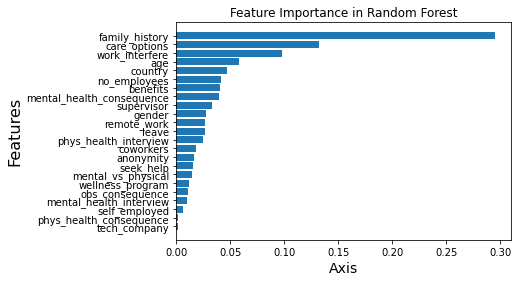

In [65]:
indices = np.argsort(importances)

figure, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])

ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

ax.set_xlabel('Axis', fontsize= 14)
ax.set_ylabel('Features', fontsize = 16)
plt.title('Feature Importance in Random Forest')

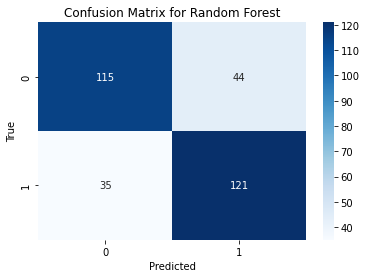

In [66]:

# Calculate and print confusion matrix
conf_matrix1 = confusion_matrix(Y_test, test_pred1)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [67]:
TN = conf_matrix1[0, 0]
FP = conf_matrix1[0, 1]
FN = conf_matrix1[1, 0]
TP = conf_matrix1[1, 1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.7492
Classification error : 0.2508
Precision : 0.7333
Recall or Sensitivity : 0.7756
True Positive Rate : 0.7756
False Positive Rate : 0.2767
Specificity : 0.7233


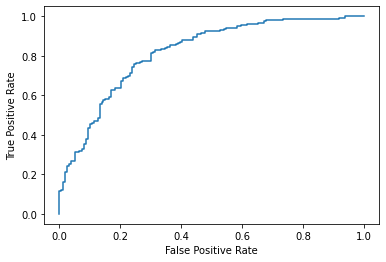

AUC SCORE:0.8178922754394452


In [68]:
test_pred1_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred1_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred1_prob)}')

### Logistics Regression Model

In [69]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

LogisticRegression()

In [70]:
train_pred2 = log_model.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred2))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred2))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred2))

Accuracy on training data:  0.7292993630573248
Precision on training data: 0.7445414847161572
Recall on training data: 0.7118997912317327


In [71]:
test_pred2=log_model.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred2))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred2))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred2))

Accuracy on testing data:  0.7238095238095238
Precision on testing data: 0.7116564417177914
Recall on testing data:  0.7435897435897436


### Feature Importance for Logistics Regression

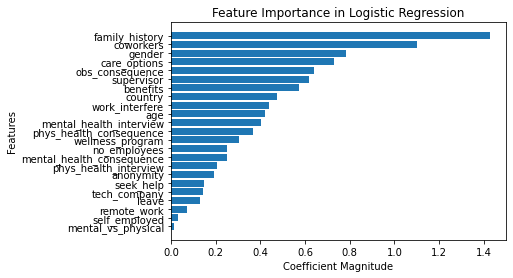

In [72]:

# Get the coefficients (weights) of the logistic regression model
coefficients = log_model.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = np.abs(coefficients)

# Get the indices of features sorted by importance
indices = np.argsort(feature_importance)

# Plotting
fig, ax = plt.subplots()
ax.barh(range(len(feature_importance)), feature_importance[indices])
ax.set_yticks(range(len(feature_importance)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()


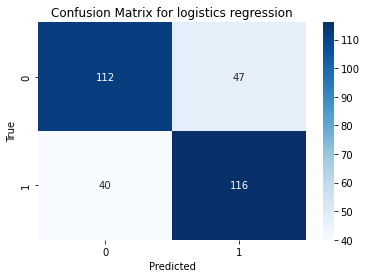

In [73]:

# Calculate and print confusion matrix
conf_matrix2 = confusion_matrix(Y_test, test_pred2)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for logistics regression')
plt.show()

In [74]:
TN = conf_matrix2[0, 0]
FP = conf_matrix2[0, 1]
FN = conf_matrix2[1, 0]
TP = conf_matrix2[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.7238
Classification error : 0.2762
Precision : 0.7117
Recall or Sensitivity : 0.7436
True Positive Rate : 0.7436
False Positive Rate : 0.2956
Specificity : 0.7044


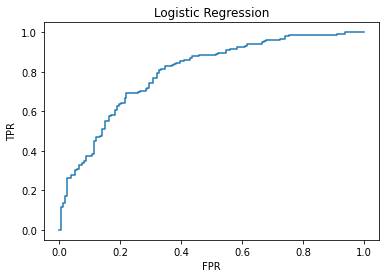

AUC SCORE:0.7970891791646507


In [75]:
cl=[('Logistic Regression',log_model)]
for clf_name,clf in cl:
    clf.fit(X_train,Y_train)
    test_pred2_proba=clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(Y_test,test_pred2_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred2_proba)}')

### Support Vector Machine

In [76]:
svm = SVC(kernel='linear', probability = True)
svm.fit (X_train, Y_train)

SVC(kernel='linear', probability=True)

In [77]:
train_pred3 = svm.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred3))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred3))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred3))

Accuracy on training data:  0.7133757961783439
Precision on training data: 0.7518072289156627
Recall on training data: 0.651356993736952


In [78]:
test_pred3=svm.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred3))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred3))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred3))

Accuracy on testing data:  0.7174603174603175
Precision on testing data: 0.7375886524822695
Recall on testing data:  0.6666666666666666


### Compute permutation importance for SVM

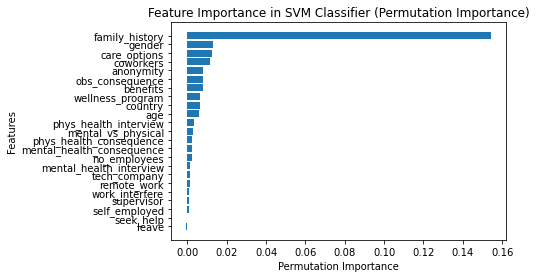

In [79]:

perm_importance = permutation_importance(svm, X_train, Y_train, n_repeats=30, random_state=0)

# Get the feature importance scores
feature_importance = perm_importance.importances_mean

# Get the indices of features sorted by importance
indices = np.argsort(feature_importance)

# Plotting
fig, ax = plt.subplots()
ax.barh(range(len(feature_importance)), feature_importance[indices])
ax.set_yticks(range(len(feature_importance)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance in SVM Classifier (Permutation Importance)')
plt.show()


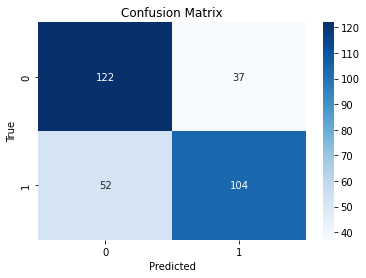

In [80]:

# Calculate and print confusion matrix
conf_matrix3 = confusion_matrix(Y_test, test_pred3)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [81]:
TN = conf_matrix3[0, 0]
FP = conf_matrix3[0, 1]
FN = conf_matrix3[1, 0]
TP = conf_matrix3[1, 1]


classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.7175
Classification error : 0.2825
Precision : 0.7376
Recall or Sensitivity : 0.6667
True Positive Rate : 0.6667
False Positive Rate : 0.2327
Specificity : 0.7673


### Naive Bayes Model

In [82]:
Nb = GaussianNB()
Nb.fit(X_train, Y_train)

GaussianNB()

In [83]:
train_pred4 = Nb.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred4))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred4))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred4))

Accuracy on training data:  0.6953290870488322
Precision on training data: 0.7171945701357466
Recall on training data: 0.6617954070981211


In [84]:
test_pred4=Nb.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred4))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred4))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred4))

Accuracy on testing data:  0.6793650793650794
Precision on testing data: 0.6821192052980133
Recall on testing data:  0.6602564102564102


### Feature Importance for Naive Bayes

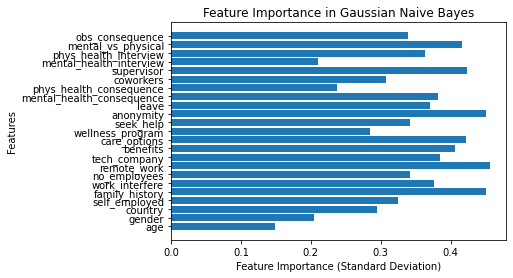

In [85]:

# Get the mean and standard deviation for each feature and each class
feature_means = Nb.theta_  # Mean of each feature per class
feature_stds = np.sqrt(Nb.sigma_)  # Standard deviation of each feature per class

# Calculate feature importance based on standard deviation across classes
feature_importance = np.mean(feature_stds, axis=0)

# Plotting
fig, ax = plt.subplots()
ax.barh(range(len(feature_importance)), feature_importance)
ax.set_yticks(range(len(feature_importance)))
_ = ax.set_yticklabels(X_train.columns)
plt.xlabel('Feature Importance (Standard Deviation)')
plt.ylabel('Features')
plt.title('Feature Importance in Gaussian Naive Bayes')
plt.show()

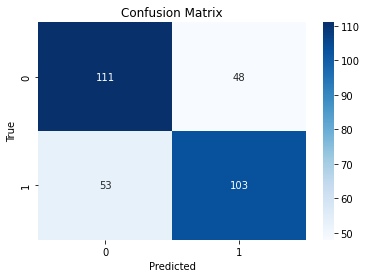

In [86]:

# Calculate and print confusion matrix
conf_matrix4 = confusion_matrix(Y_test, test_pred4)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [87]:
TN = conf_matrix4[0, 0]
FP = conf_matrix4[0, 1]
FN = conf_matrix4[1, 0]
TP = conf_matrix4[1, 1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.6794
Classification error : 0.3206
Precision : 0.6821
Recall or Sensitivity : 0.6603
True Positive Rate : 0.6603
False Positive Rate : 0.3019
Specificity : 0.6981


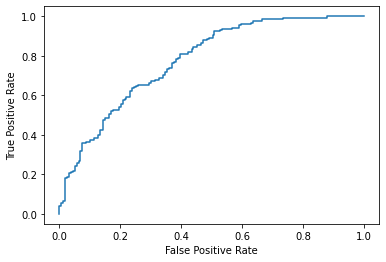

AUC SCORE:0.7775761973875182


In [88]:
test_pred4_prob=Nb.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred4_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred4_prob)}')

### Voting Classifier

In [89]:
estimator = [] 
estimator.append(('Naive Bayes',  
                  GaussianNB())) 
estimator.append(('Random Forest', RandomForestClassifier(n_estimators=10,n_jobs=-1, min_samples_leaf = 0.01, random_state=108)))
estimator.append(('Logistics Regression',  
                  LogisticRegression())) 

In [90]:
Vc = VotingClassifier(estimators= estimator, voting='soft')
Vc.fit(X_train, Y_train)

VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('Random Forest',
                              RandomForestClassifier(min_samples_leaf=0.01,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=108)),
                             ('Logistics Regression', LogisticRegression())],
                 voting='soft')

In [91]:
train_pred5 = Vc.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred5))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred5))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred5))

Accuracy on training data:  0.7367303609341825
Precision on training data: 0.7452229299363057
Recall on training data: 0.732776617954071


In [92]:
test_pred5=Vc.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred5))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred5))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred5))

Accuracy on testing data:  0.726984126984127
Precision on testing data: 0.7108433734939759
Recall on testing data:  0.7564102564102564


### Feature Imporatance for Voting Classifier

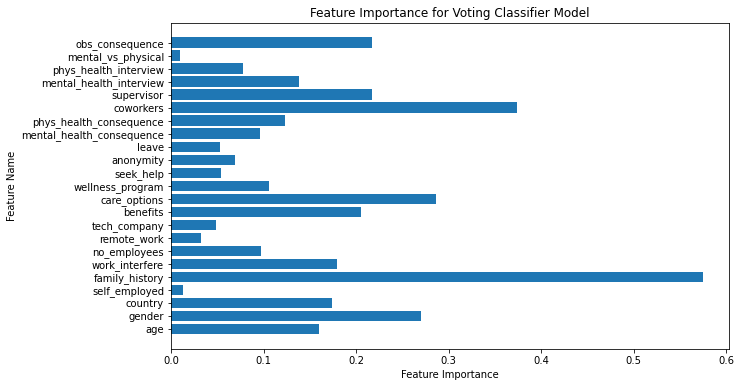

In [93]:
original_feature_names = ['age', 'gender', 'country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 
                          'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
                          'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 
                          'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Calculate feature importance based on individual classifiers
feature_importance = np.zeros(X_train.shape[1])

for clf_name, clf in Vc.named_estimators_.items():
    if hasattr(clf, 'coef_'): 
        feature_importance += np.abs(clf.coef_[0])
    elif hasattr(clf, 'feature_importances_'): 
        feature_importance += clf.feature_importances_

# Normalize feature importance
feature_importance /= len(Vc.estimators_)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importance, align='center')
plt.yticks(range(X_train.shape[1]),original_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Voting Classifier Model')
plt.show()

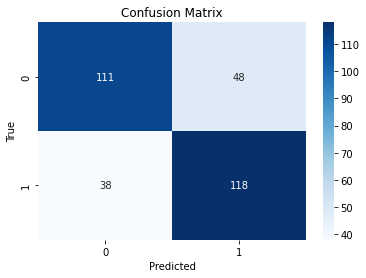

In [94]:

# Calculate and print confusion matrix
conf_matrix5 = confusion_matrix(Y_test, test_pred5)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [95]:
TN = conf_matrix5[0, 0]
FP = conf_matrix5[0, 1]
FN = conf_matrix5[1, 0]
TP = conf_matrix5[1, 1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.7270
Classification error : 0.2730
Precision : 0.7108
Recall or Sensitivity : 0.7564
True Positive Rate : 0.7564
False Positive Rate : 0.3019
Specificity : 0.6981


### KNN Model 

In [96]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train) 

KNeighborsClassifier(n_neighbors=7)

In [97]:
train_pred6 = knn.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred6))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred6))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred6))

Accuracy on training data:  0.7569002123142251
Precision on training data: 0.7659574468085106
Recall on training data: 0.7515657620041754


In [98]:
test_pred6=knn.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_pred6))
print("Precision on testing data:", metrics.precision_score(Y_test,test_pred6))
print("Recall on testing data: ", metrics.recall_score(Y_test, test_pred6))

Accuracy on testing data:  0.6952380952380952
Precision on testing data: 0.7054794520547946
Recall on testing data:  0.6602564102564102


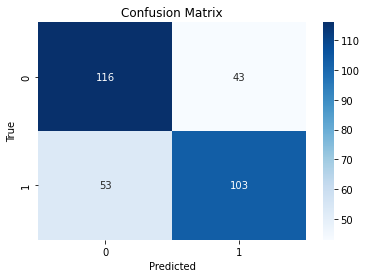

In [99]:

# Calculate and print confusion matrix
conf_matrix6 = confusion_matrix(Y_test, test_pred6)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix6, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [100]:
TN = conf_matrix6[0, 0]
FP = conf_matrix6[0, 1]
FN = conf_matrix6[1, 0]
TP = conf_matrix6[1, 1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.6952
Classification error : 0.3048
Precision : 0.7055
Recall or Sensitivity : 0.6603
True Positive Rate : 0.6603
False Positive Rate : 0.2704
Specificity : 0.7296


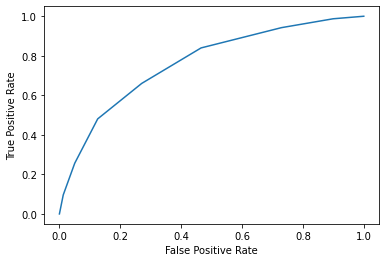

AUC SCORE:0.7630019351717464


In [101]:
test_pred6_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(Y_test,test_pred6_prob)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print(f'AUC SCORE:{roc_auc_score(Y_test,test_pred6_prob)}')

### Implementing the deep learning Algorithms

### Radial basic Function Neural Network

In [102]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)



In [103]:
# Assigns the scaled training data to the variable maindata.
maindata = X_train_scaled

#  Constructs an array containing the maindata. This will be used as the centroids for the K-means clustering algorithm.
Cent = np.array([maindata])



In [104]:
# Defines the number of clusters (centroids) for the K-means algorithm.
K_clust = 10

# Determines the number of columns (features) in the scaled training data.
column = maindata.shape[1]  # Number of columns in maindata
max_distance = 0

# Loop over centroids
# This code calculates the maximum distance between any two centroids in the dataset and uses it to 
# determine the value of sigma, which is a parameter used in the Radial Basis Function (RBF) kernel.

for i in range(K_clust):
    # Loop over data points
    for j in range(column):
        # Calculate distance between the ith centroid and the jth data point
        d = np.linalg.norm(Cent[0, i] - Cent[0, j])
        if d > max_distance:
            max_distance = d

d = max_distance
sigma = d / np.sqrt(2 * K_clust)



In [105]:
#  Defines the number of clusters (centroids) for K-means clustering.
K_cent= 8

# Initializes the K-means clustering algorithm with the specified number of clusters (K_cent) and maximum number of iterations.
km= KMeans(n_clusters= K_cent, max_iter= 100, random_state=108)

#  Fits the K-means model to the scaled training data, determining the centroids.
km.fit(X_train)
cent= km.cluster_centers_



In [106]:
# This part of the code calculates the maximum distance between any two centroids in the K-means clustering results (cent). 
# This distance is used to determine the value of sigma, which is a parameter in the Radial Basis Function (RBF) kernel.
# K_cent is the number of clusters (centroids) obtained from the K-means clustering.
max=0 
for i in range(K_cent):
    for j in range(K_cent):
        d= numpy.linalg.norm(cent[i]-cent[j])
        if(d> max):
            max= d
d= max

sigma= d/math.sqrt(2*K_cent)



In [107]:
# This section computes the activation matrix G for the RBF neural network. 
# The activation of each neuron (RBF) is calculated based on the distance
# between each data point in the training set (X_train) and the centroids (cent). 
# The activation is determined using the RBF function with the calculated sigma.

X_train_array = X_train.values  # Convert X_train to a NumPy array
shape = X_train_array.shape
row = shape[0]
column = K_cent
G = numpy.empty((row, column), dtype=float)
for i in range(row):
    for j in range(column):
        dist = numpy.linalg.norm(X_train_array[i] - cent[j])
        G[i][j] = math.exp(-math.pow(dist, 2) / math.pow(2 * sigma, 2))

        

In [108]:
# This part of the code computes the weights W for the RBF neural network using a linear least squares approach. 
# It calculates the pseudo-inverse of the matrix GTG (Gramian matrix of G), multiplies it with the transpose of G,
# and then with the target values Y_train 
GTG= numpy.dot(G.T,G)
GTG_inv= numpy.linalg.inv(GTG)
fac= numpy.dot(GTG_inv,G.T)
W= numpy.dot(fac,Y_train)


In [109]:
# This section calculates the activation matrix G_test for the test data (X_test). 
# It follows a similar procedure as before, computing the activation of each neuron (RBF) 
# based on the distance between each data point in the test set and the centroids (cent).
X_test_array = X_test.values  # Convert X_test to a NumPy array
row = X_test_array.shape[0]
column = K_cent
G_test = numpy.empty((row, column), dtype=float)
for i in range(row):
    for j in range(column):
        dist = numpy.linalg.norm(X_test_array[i] - cent[j])
        G_test[i][j] = math.exp(-math.pow(dist, 2) / math.pow(2 * sigma, 2))

        

In [110]:
#Finally, the code computes predictions for the test data by multiplying the activation matrix G_test with the weights W. 
# It then applies a threshold to the predictions, converting them to binary values (0 or 1) using a step function.
prediction= numpy.dot(G_test,W)
prediction= 0.5*(numpy.sign(prediction-0.5)+1)

accuracy = accuracy_score(prediction,Y_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, prediction, average='binary')




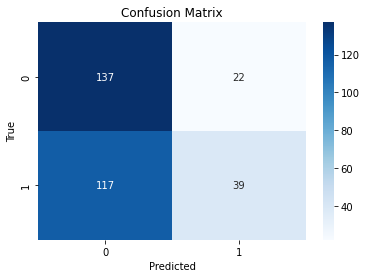

In [111]:
# Calculate and print confusion matrix
conf_matrix7 = confusion_matrix(Y_test, prediction)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix7, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [112]:
# Print scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.5587301587301587
Precision: 0.639344262295082
Recall: 0.25


### MLP Algorithm

In [113]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', 
                                max_iter=100, random_state=108)

In [114]:
# Train the MLP classifier
mlp.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=108)

In [115]:
# Predict on the test set
mlp_pred2 = mlp.predict(X_test)

print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, mlp_pred2))
print("Precision on testing data:", metrics.precision_score(Y_test,mlp_pred2))
print("Recall on testing data: ", metrics.recall_score(Y_test, mlp_pred2))


Accuracy on testing data:  0.7238095238095238
Precision on testing data: 0.7116564417177914
Recall on testing data:  0.7435897435897436


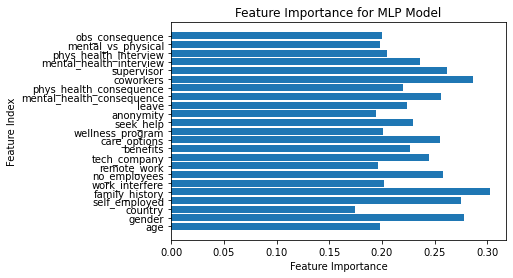

In [116]:
original_feature_names = ['age', 'gender', 'country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 
                          'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
                          'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 
                          'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']
# Get the weights assigned to each feature
weights = mlp.coefs_[0]



# Calculate feature importance based on weights
feature_importance = np.abs(weights).mean(axis=1)



# Plot feature importance
plt.barh(range(X_train.shape[1]),  feature_importance)
plt.yticks(range(X_train.shape[1]), original_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance for MLP Model')
plt.show()

In [117]:
print("Classification Report:")
print(classification_report(Y_test, mlp_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       159
           1       0.71      0.74      0.73       156

    accuracy                           0.72       315
   macro avg       0.72      0.72      0.72       315
weighted avg       0.72      0.72      0.72       315



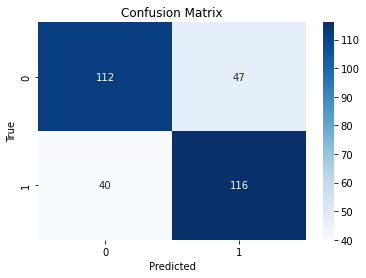

In [118]:
# Calculate and print confusion matrix
conf_matrix8 = confusion_matrix(Y_test, mlp_pred2)

# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix8, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
